In [351]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score,recall_score,mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt
import os
from pylab import savefig
plt.style.use('seaborn-colorblind')
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [320]:
virus_zika = pd.read_csv('zika_finalized.csv')

In [321]:
virus_zika.dtypes

Last Update       object
Country           object
Province/State    object
Confirmed          int64
dtype: object

In [322]:
virus_zika.head()

,Last Update,Country,Province/State,Confirmed
0,2016-03-19,Argentina,Buenos Aires,2
1,2016-03-19,Argentina,Buenos Aires,1
2,2016-03-19,Argentina,Buenos Aires,127
3,2016-03-19,Argentina,CABA,9
4,2016-03-19,Argentina,CABA,68


In [323]:
virus_zika['year'] = pd.DatetimeIndex(virus_zika['Last Update']).year
virus_zika.head()

,Last Update,Country,Province/State,Confirmed,year
0,2016-03-19,Argentina,Buenos Aires,2,2016
1,2016-03-19,Argentina,Buenos Aires,1,2016
2,2016-03-19,Argentina,Buenos Aires,127,2016
3,2016-03-19,Argentina,CABA,9,2016
4,2016-03-19,Argentina,CABA,68,2016


In [324]:
virus_zika['month'] = pd.DatetimeIndex(virus_zika['Last Update']).month
virus_zika.head()

,Last Update,Country,Province/State,Confirmed,year,month
0,2016-03-19,Argentina,Buenos Aires,2,2016,3
1,2016-03-19,Argentina,Buenos Aires,1,2016,3
2,2016-03-19,Argentina,Buenos Aires,127,2016,3
3,2016-03-19,Argentina,CABA,9,2016,3
4,2016-03-19,Argentina,CABA,68,2016,3


In [325]:
virus_zika['day'] = pd.DatetimeIndex(virus_zika['Last Update']).day
virus_zika.head()

,Last Update,Country,Province/State,Confirmed,year,month,day
0,2016-03-19,Argentina,Buenos Aires,2,2016,3,19
1,2016-03-19,Argentina,Buenos Aires,1,2016,3,19
2,2016-03-19,Argentina,Buenos Aires,127,2016,3,19
3,2016-03-19,Argentina,CABA,9,2016,3,19
4,2016-03-19,Argentina,CABA,68,2016,3,19


In [326]:
virus_zika.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9036 entries, 0 to 9035
Data columns (total 7 columns):
Last Update       9036 non-null object
Country           9036 non-null object
Province/State    9036 non-null object
Confirmed         9036 non-null int64
year              9036 non-null int64
month             9036 non-null int64
day               9036 non-null int64
dtypes: int64(4), object(3)
memory usage: 494.3+ KB


In [327]:
virus_zika['Confirmed'] = virus_zika['Confirmed'] > 5 

In [328]:
cat_col =['Province/State','Country']
num_col = ['day', 'month']

In [329]:
virus_zika['Confirmed'].value_counts()

True     4773
False    4263
Name: Confirmed, dtype: int64

In [330]:
gr = ExtraTreesClassifier(n_estimators =300,n_jobs=-1,max_depth=4)

In [331]:
X = virus_zika[cat_col + num_col]
y =  virus_zika['Confirmed'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

categorical_columns = ['Province/State','Country','day', 'month']
numerical_columns = []
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessing = ColumnTransformer(
    [('cat', categorical_pipe, categorical_columns)])

rf = Pipeline([
    ('preprocess', preprocessing),
    ('feature_selection', SelectFromModel(gr, prefit=False)),
    ('classifier', gr)
])

In [332]:
rf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                        

In [333]:
rf.score(X_train,y_train)

0.6280064925483252

In [334]:
rf.score(X_test, y_test)

0.6228419654714475

In [335]:
rf.predict(virus_zika)

array([ True,  True,  True, ...,  True,  True,  True])

In [336]:
virus_corona = pd.read_csv('corona_finalized.csv')

In [337]:
virus_corona['month'] = pd.DatetimeIndex(virus_corona['Last Update']).month
virus_corona.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,month
0,Hubei,Mainland China,2020-01-30 21:30:00,5806,204,116,1
1,Zhejiang,Mainland China,2020-01-30 21:30:00,537,0,9,1
2,Guangdong,Mainland China,2020-01-30 21:30:00,393,0,11,1
3,Henan,Mainland China,2020-01-30 21:30:00,352,2,3,1
4,Hunan,Mainland China,2020-01-30 21:30:00,332,0,2,1


In [338]:
virus_corona['day'] = pd.DatetimeIndex(virus_corona['Last Update']).day
virus_corona.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,month,day
0,Hubei,Mainland China,2020-01-30 21:30:00,5806,204,116,1,30
1,Zhejiang,Mainland China,2020-01-30 21:30:00,537,0,9,1,30
2,Guangdong,Mainland China,2020-01-30 21:30:00,393,0,11,1,30
3,Henan,Mainland China,2020-01-30 21:30:00,352,2,3,1,30
4,Hunan,Mainland China,2020-01-30 21:30:00,332,0,2,1,30


In [339]:
X = virus_corona[cat_col + num_col]


In [340]:
rf.predict(X)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [341]:
virus_zika['Province/State'] = pd.Categorical(virus_zika['Province/State'])

In [342]:
virus_zika['Province/State'] = virus_zika['Province/State'].cat.codes

In [343]:
virus_zika['Country'] = pd.Categorical(virus_zika['Country'])

In [344]:
virus_zika['Country'] = virus_zika['Country'].cat.codes

In [345]:
virus_zika.head()

,Last Update,Country,Province/State,Confirmed,year,month,day
0,2016-03-19,0,12,False,2016,3,19
1,2016-03-19,0,12,False,2016,3,19
2,2016-03-19,0,12,True,2016,3,19
3,2016-03-19,0,14,True,2016,3,19
4,2016-03-19,0,14,True,2016,3,19


C:\Users\ohyon\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ohyon\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


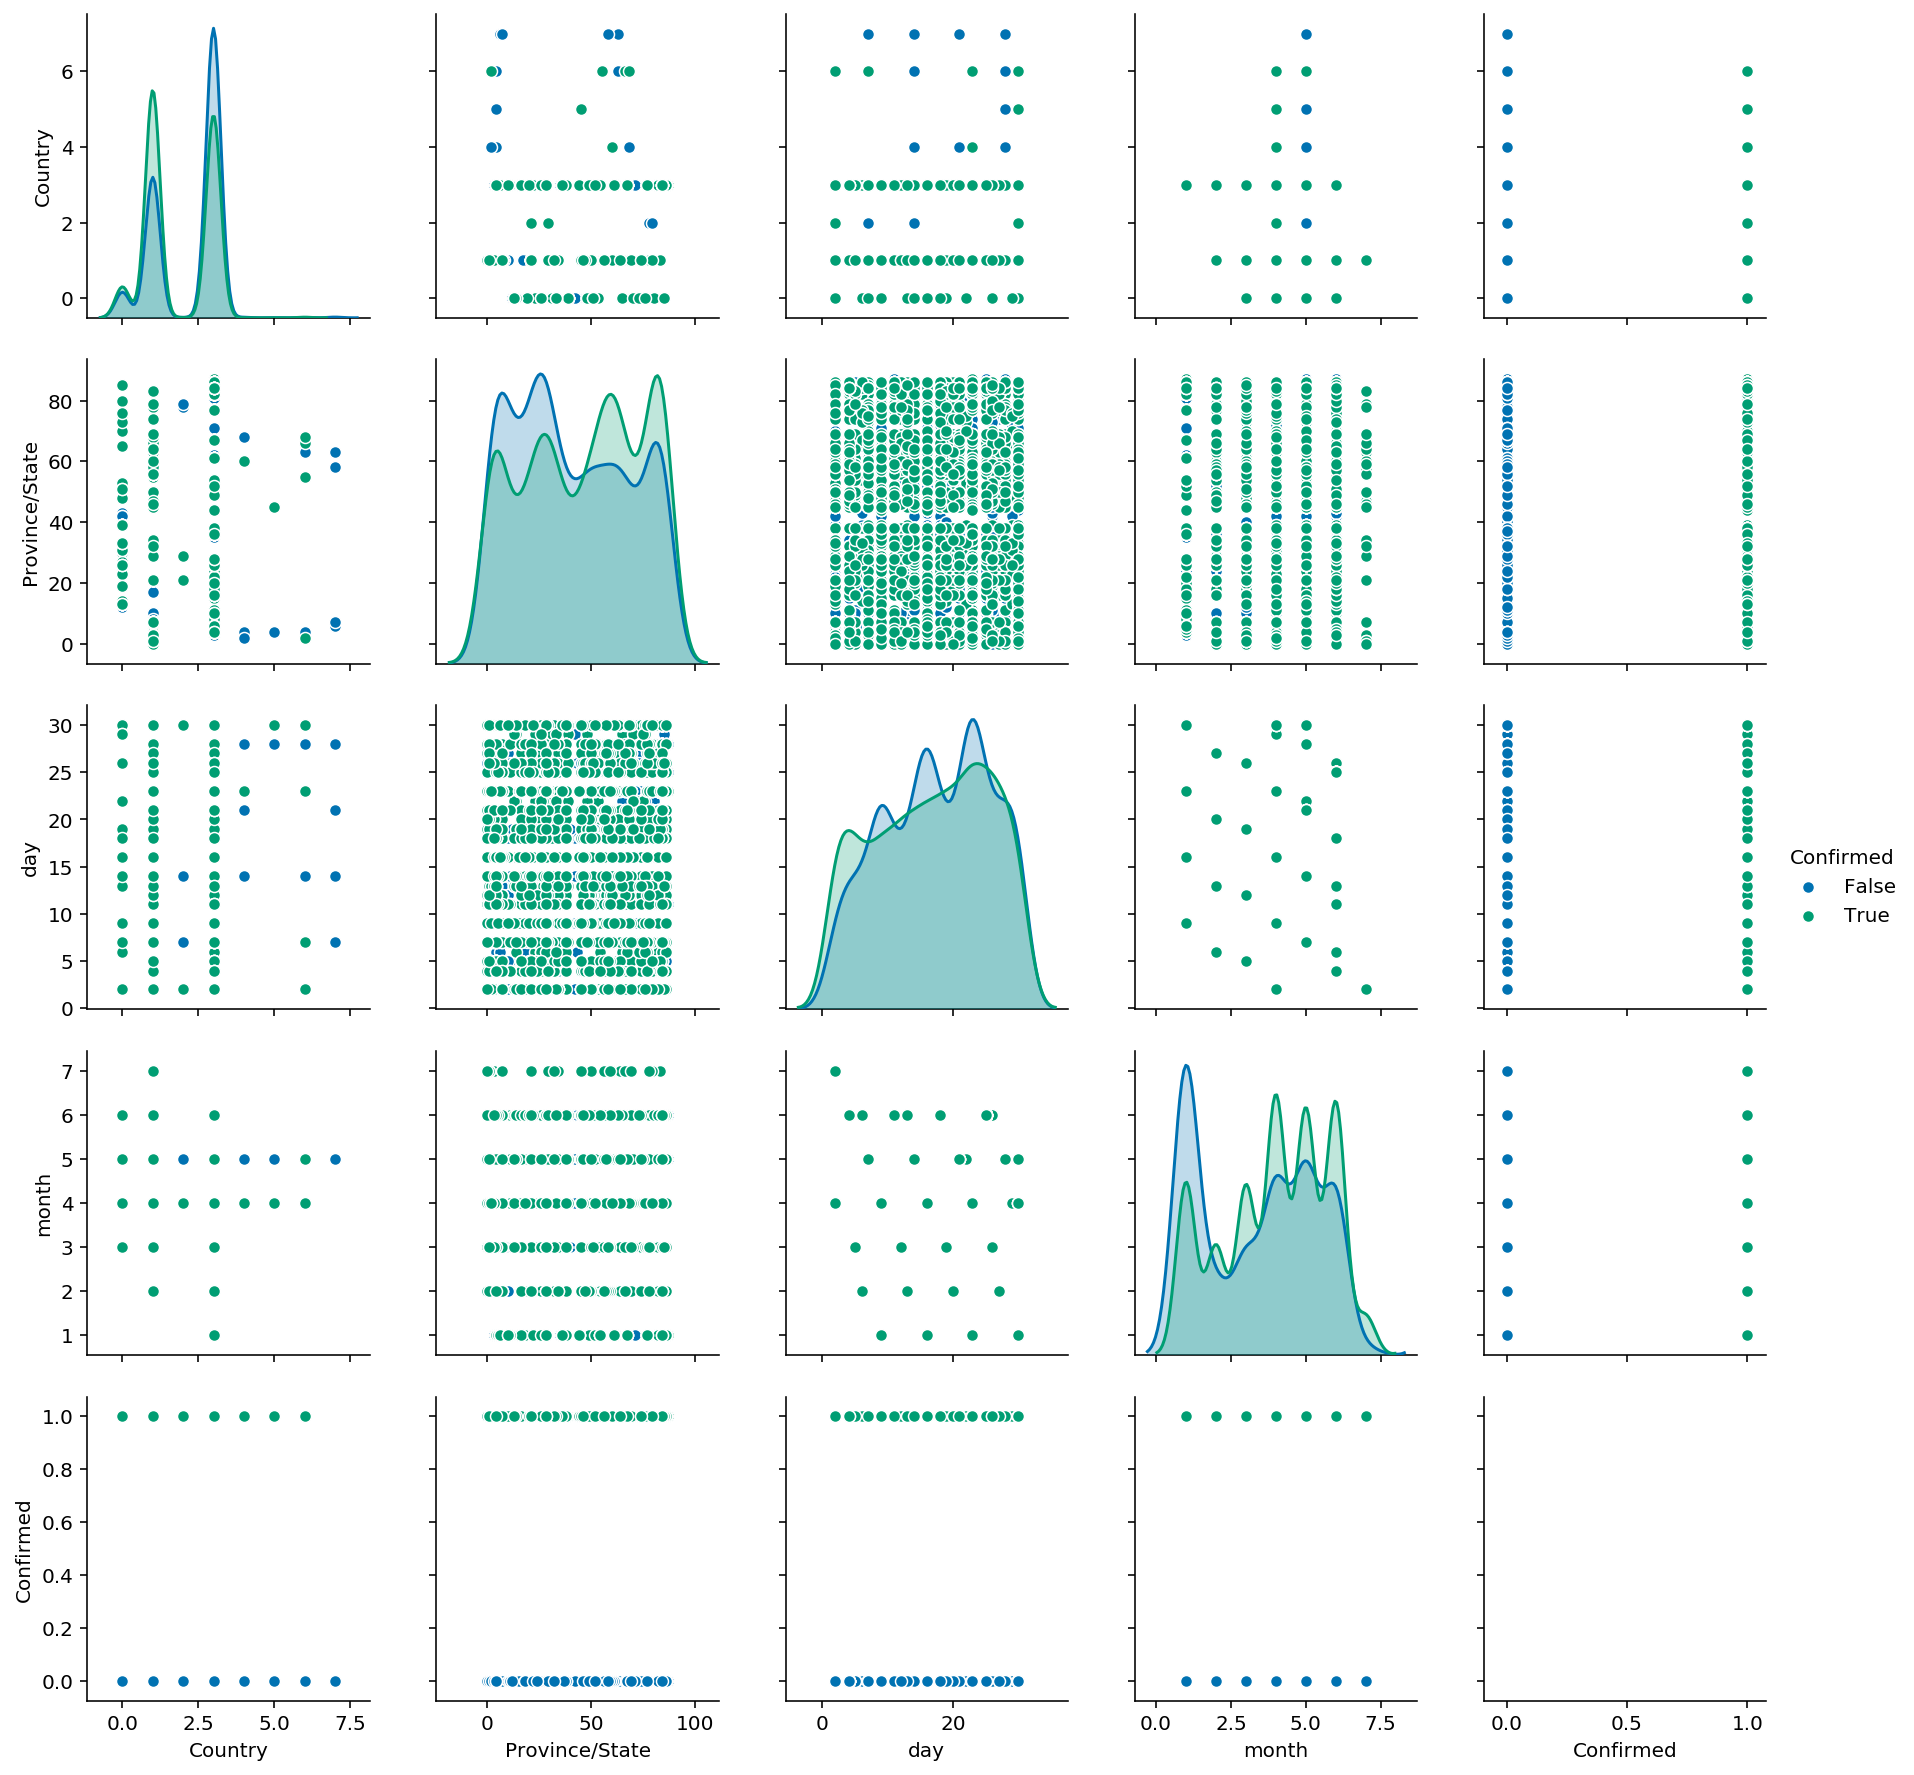

In [352]:
ml = sns.pairplot(virus_zika[['Country', 'Province/State','day', 'month', 'Confirmed']].sample(n=5000, random_state=1), diag_kind = 'kde',hue='Confirmed',height=2.5);

In [355]:
ml.savefig('zika_corona_ML.png', dpi=100)